In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer
from sklearn.metrics import silhouette_score

In [105]:
creditcard_df = pd.read_csv("Dataset/CC GENERAL.csv")

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for use

In [106]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [107]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [108]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [109]:
dtypes = pd.DataFrame(creditcard_df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=creditcard_df.nunique()

dtypes["Null Values"]=creditcard_df.isnull().sum()

dtypes["% null Values"]=creditcard_df.isnull().sum()/len(creditcard_df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
MINIMUM_PAYMENTS,float64,8636,313,0.034972
CREDIT_LIMIT,float64,205,1,0.000112
CUST_ID,object,8950,0,0.000000
BALANCE,float64,8871,0,0.000000
PRC_FULL_PAYMENT,float64,47,0,0.000000
PAYMENTS,float64,8711,0,0.000000
PURCHASES_TRX,int64,173,0,0.000000
CASH_ADVANCE_TRX,int64,65,0,0.000000
CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000


<AxesSubplot: >

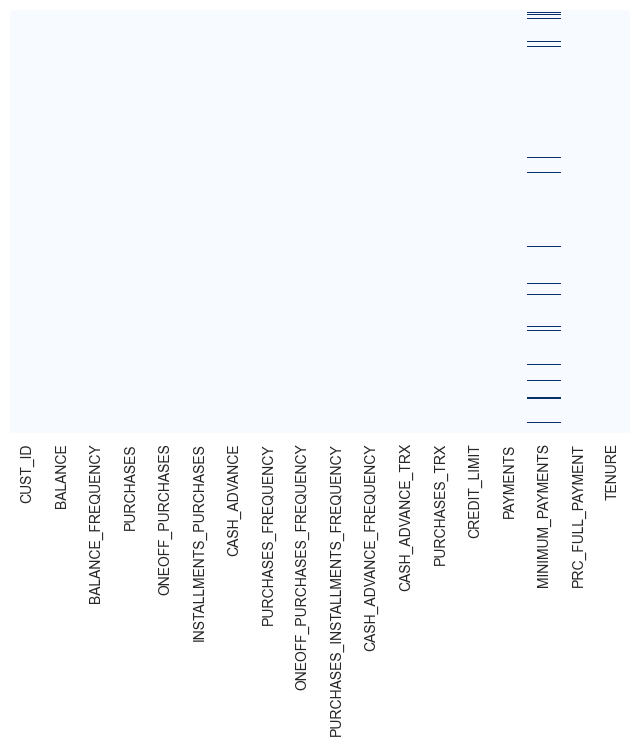

In [110]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [111]:
# Lines with null values ​​represent 3.5% of the total. With such a low percentage, all those lines are removed from the data set.
creditcard_df = creditcard_df.dropna()
creditcard_df = creditcard_df.reset_index(drop=True)

In [112]:
creditcard_df.drop("CUST_ID", axis = 1, inplace=True) # Not necessary

In [113]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

array([[<AxesSubplot: title={'center': 'BALANCE'}>,
        <AxesSubplot: title={'center': 'BALANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES'}>],
       [<AxesSubplot: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE'}>,
        <AxesSubplot: title={'center': 'PURCHASES_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_TRX'}>,
        <AxesSubplot: title={'center': 'PURCHASES_TRX'}>],
       [<AxesSubplot: title={'center': 'CREDIT_LIMIT'}>,
        <AxesSubplot: title={'center': 'PAYMENTS'}>,
        <AxesSubplot: title={'center': 'MINIMUM_PAYMENTS'}>,
        <AxesSubplot: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes

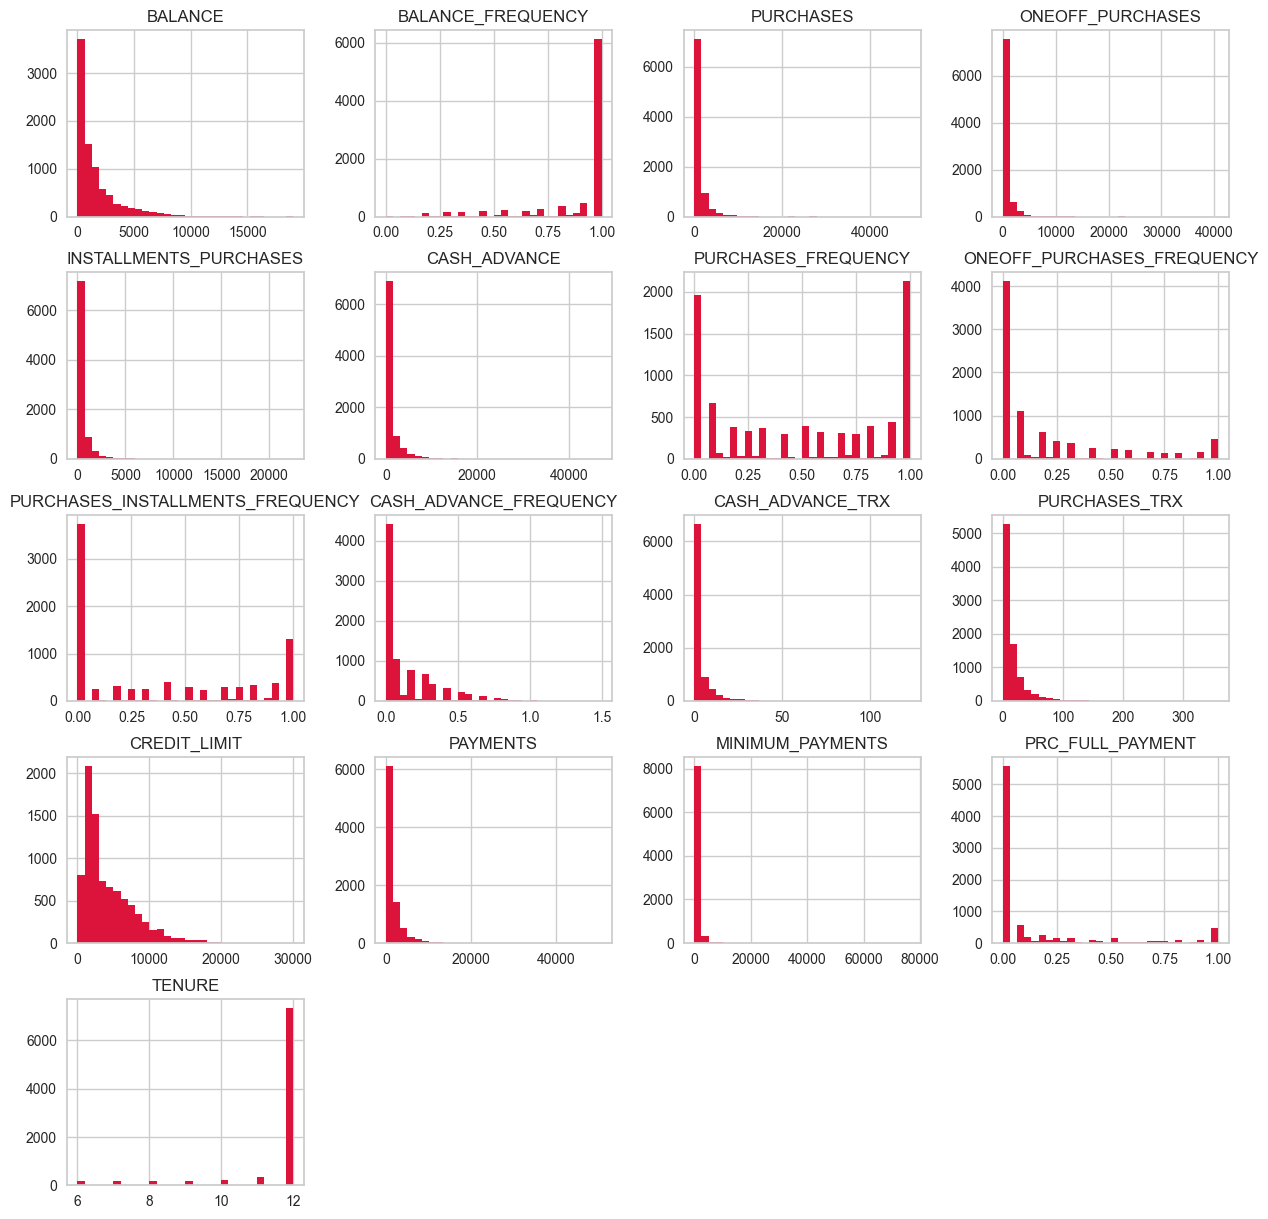

In [114]:
creditcard_df.hist(bins = 30, figsize=(15,15), color = '#DC143C')

<AxesSubplot: >

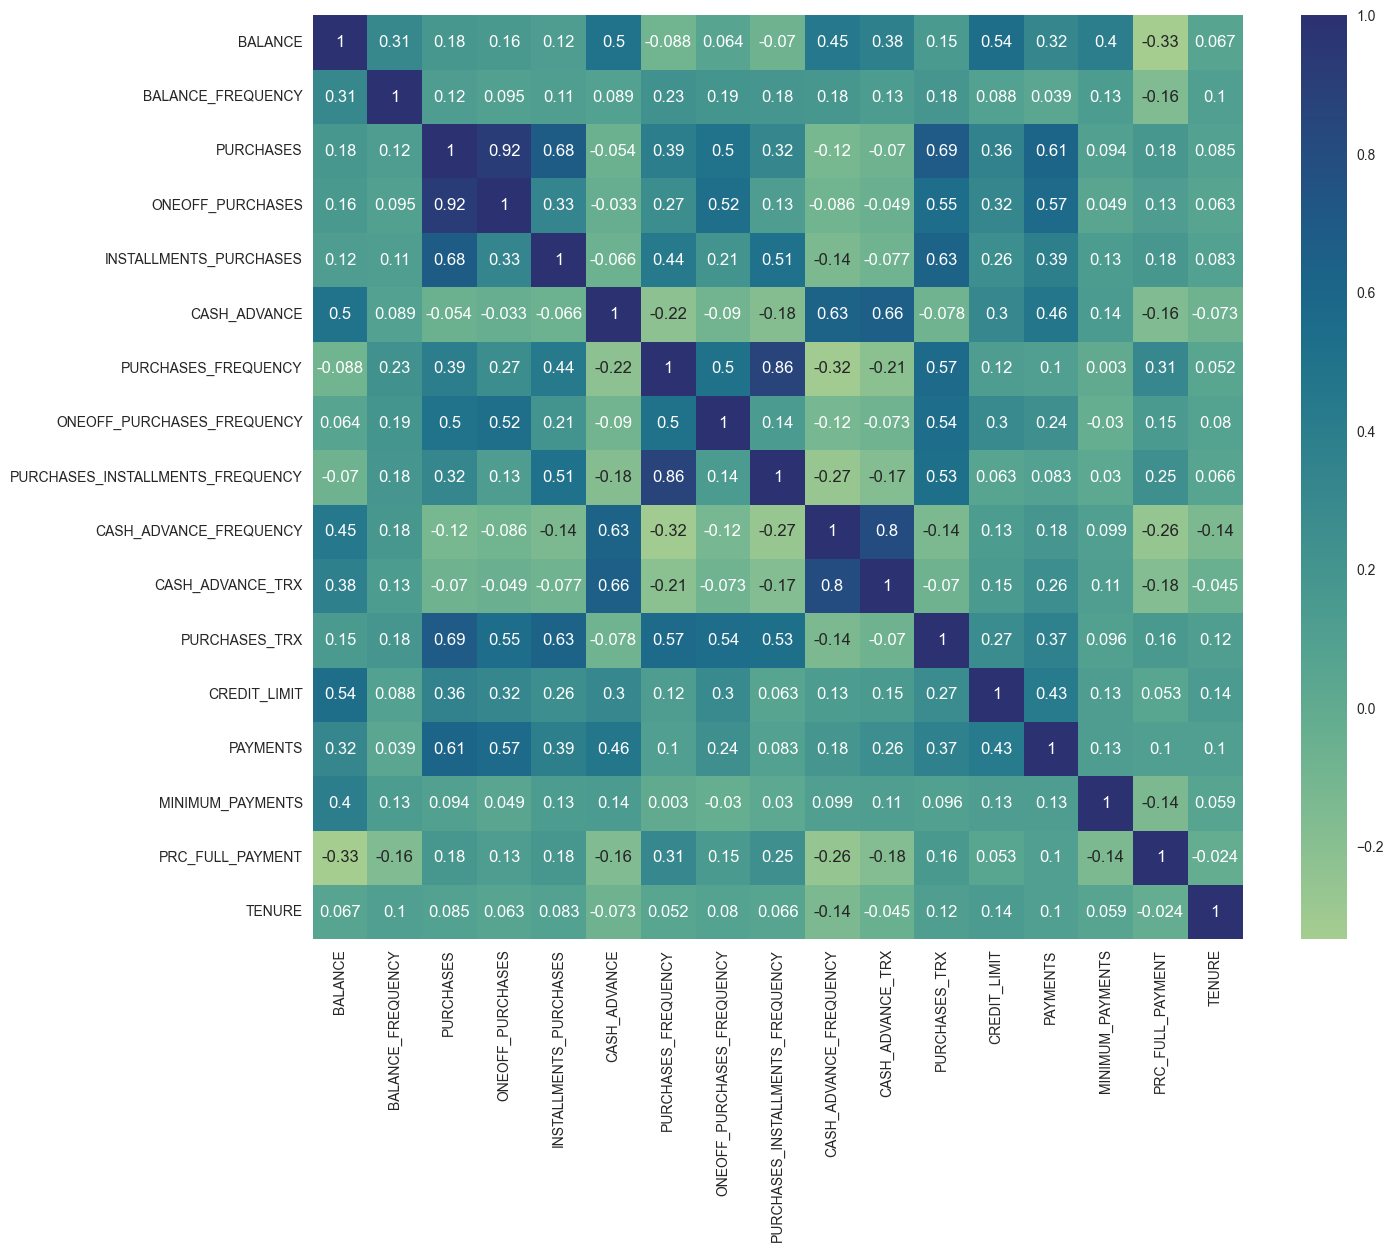

In [122]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (15,12))
sns.heatmap(correlations, annot=True, cmap="crest")

In [95]:
Scaler = StandardScaler()
df_scaled = Scaler.fit_transform(creditcard_df)  # Kmeans needs the standardized data

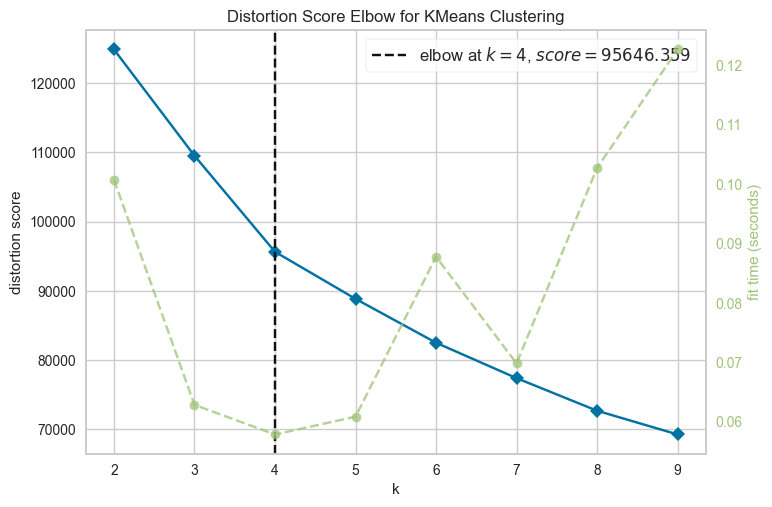

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [97]:
import warnings
warnings.filterwarnings('ignore')

kelbow_visualizer(KMeans(random_state=4), df_scaled, k=(2,10))

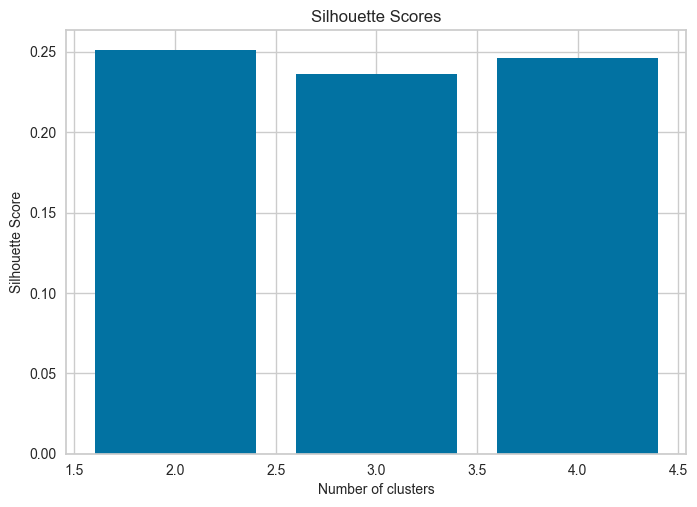

In [119]:
n_clusters=4
silhouette_scores = [] 

for n_cluster in range(2 , n_clusters+1):

  kmeans = KMeans(n_cluster, random_state=0)

  labels = kmeans.fit_predict(df_scaled)

  silhouette_scores.append(silhouette_score(df_scaled, labels))
    
plt.bar(range(2 , n_clusters+1), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title('Silhouette Scores')
plt.show()

In [98]:
kmeans = KMeans(n_clusters=4, random_state=123)

scaled_labesl = kmeans.fit_predict(df_scaled)

In [99]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers = Scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,4653.651267,0.969126,504.149178,318.966635,185.270493,4587.997562,0.289897,0.139586,0.187426,0.487283,14.454152,7.745675,7644.943378,3554.162907,2037.893411,0.035326,11.384083,-3.774758e-15
1,917.129539,0.946277,1269.738766,611.868228,658.152541,219.228299,0.888273,0.302405,0.715251,0.043886,0.816432,22.538180,4267.813150,1380.226197,653.160454,0.274466,11.603849,3.000000e+00
2,1059.633146,0.819115,274.964896,211.741022,63.502165,604.162132,0.175744,0.088321,0.083662,0.118863,2.204456,3.031455,3257.379642,1013.058339,572.988802,0.084488,11.477851,1.000000e+00
3,3589.193728,0.987670,7843.311228,5228.017417,2616.828338,663.280441,0.945443,0.741297,0.786616,0.071375,2.115090,90.838875,9758.312020,7464.098243,2004.943987,0.291523,11.948849,2.000000e+00


In [100]:
creditcard_df["Clusters"] = scaled_labesl
creditcard_df["Clusters"] = creditcard_df["Clusters"].astype('category')
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,2
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


<Figure size 2000x3500 with 0 Axes>

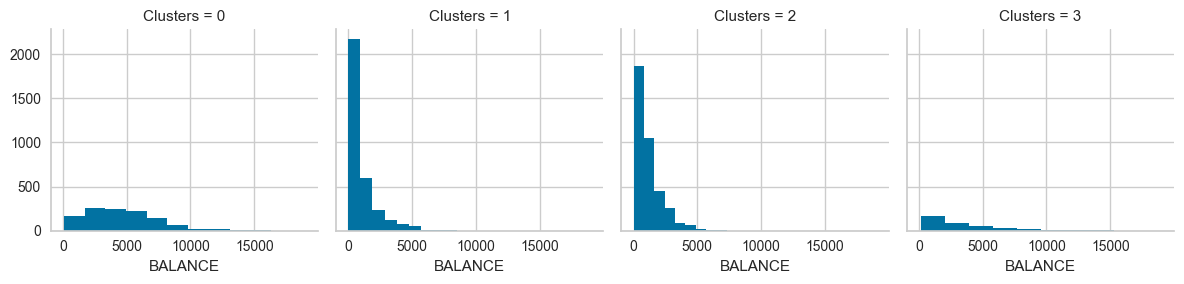

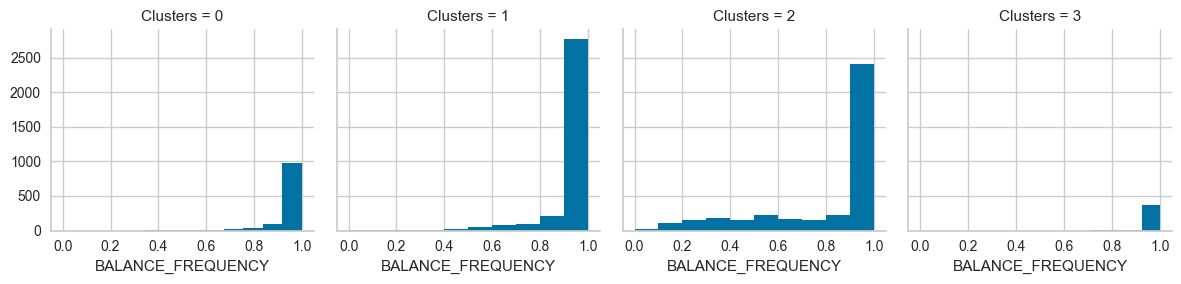

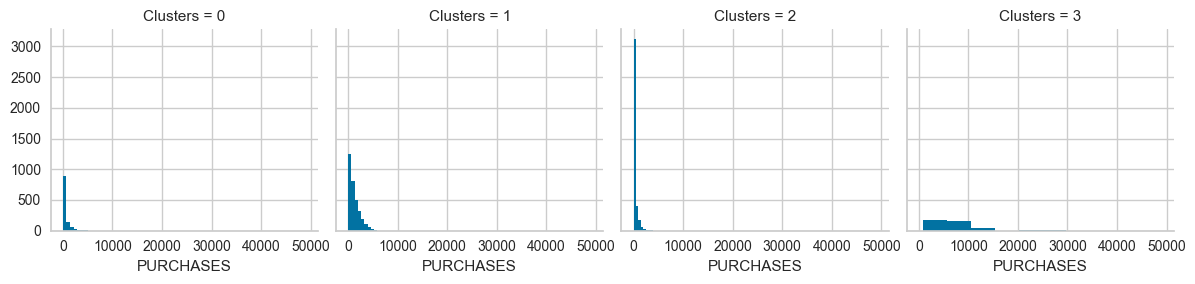

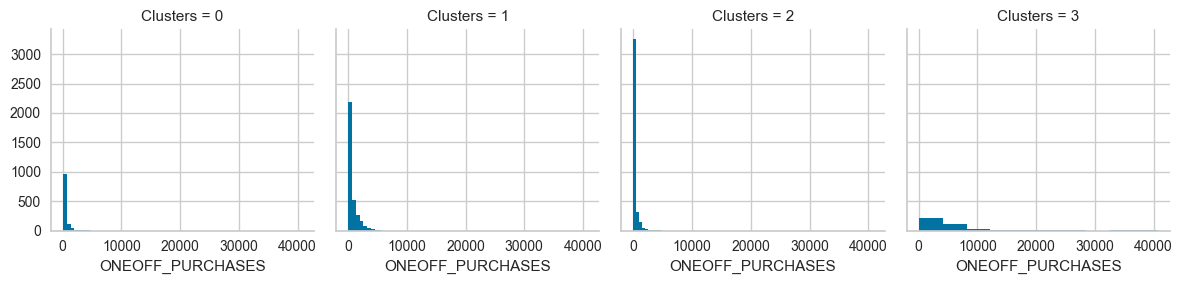

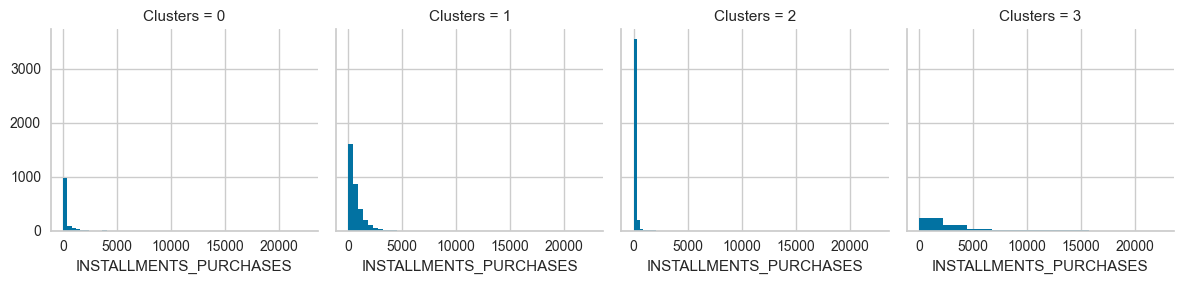

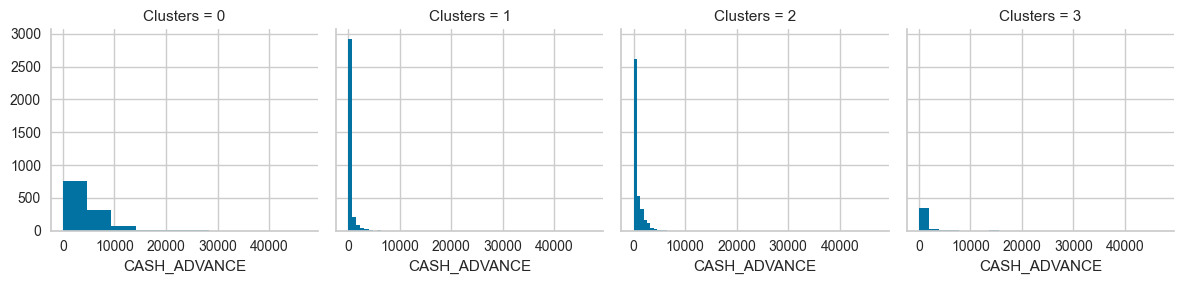

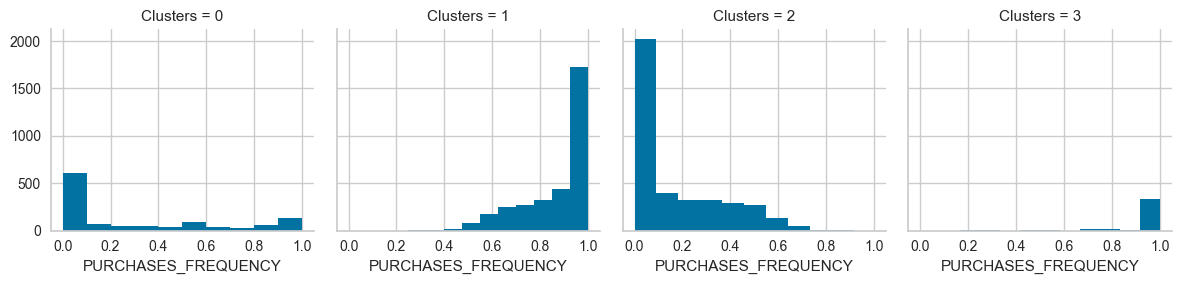

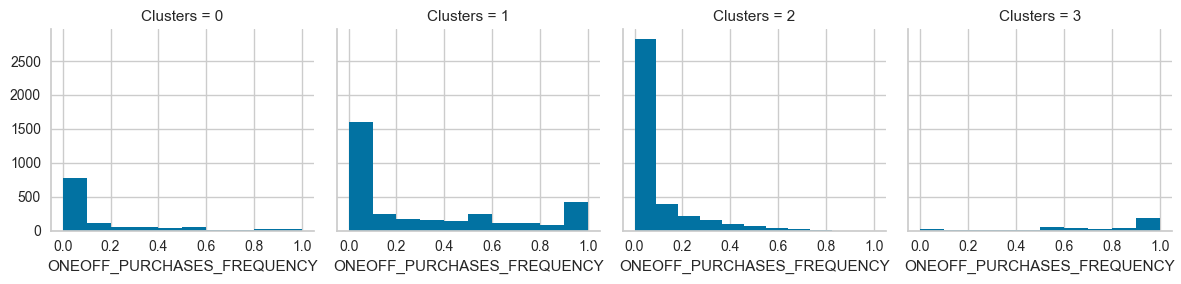

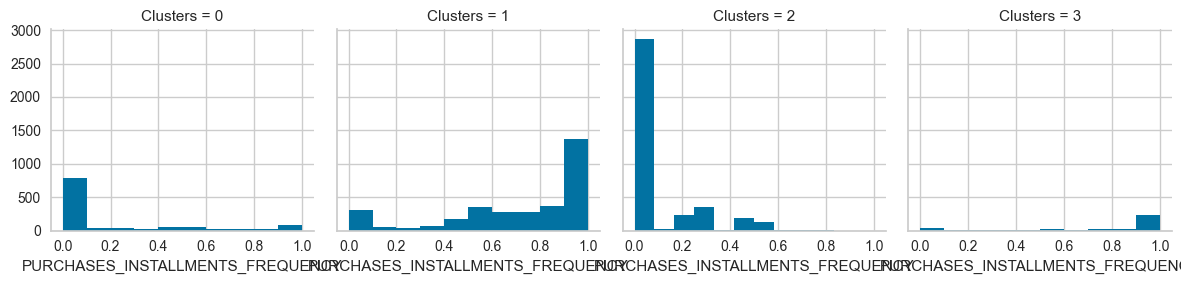

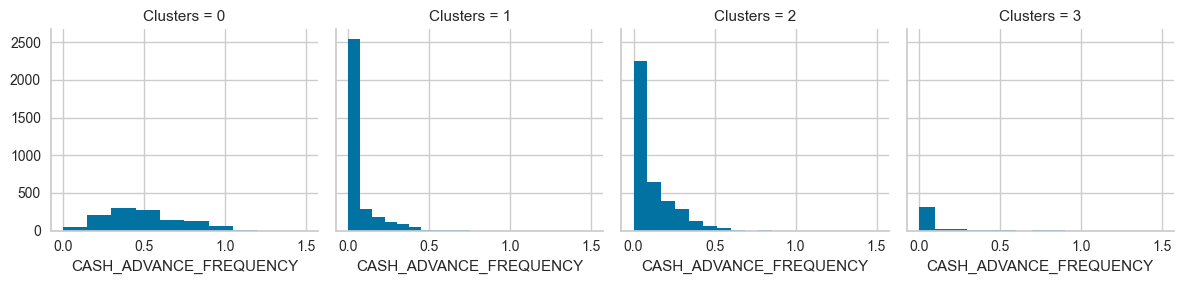

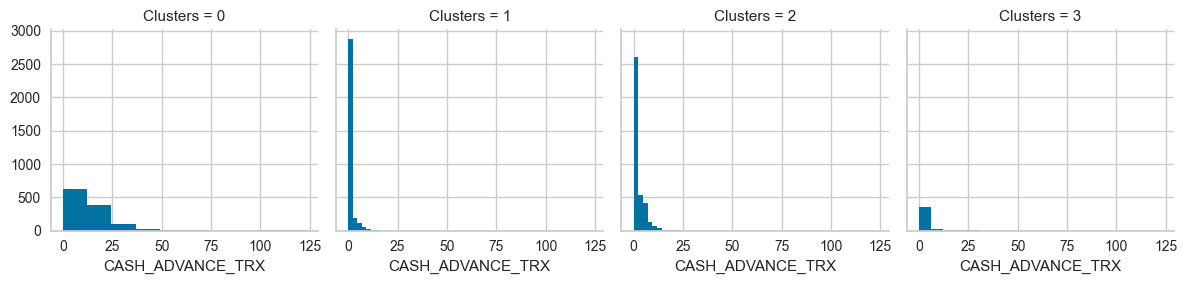

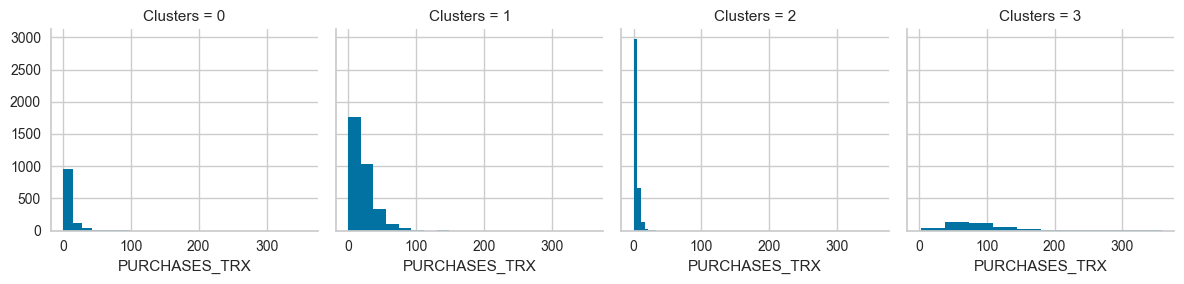

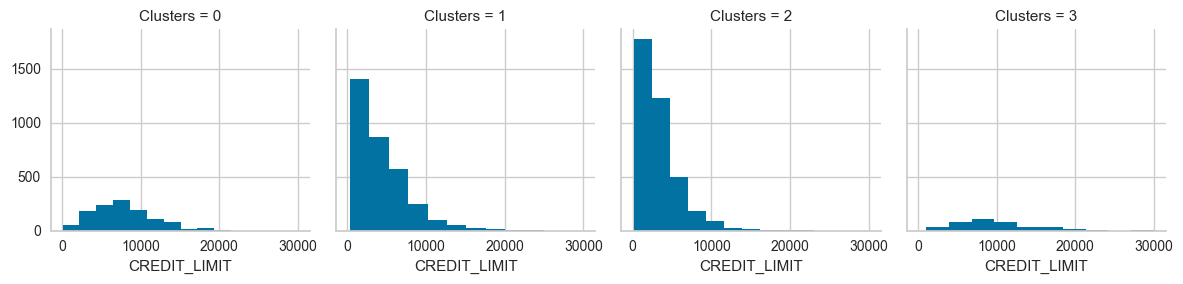

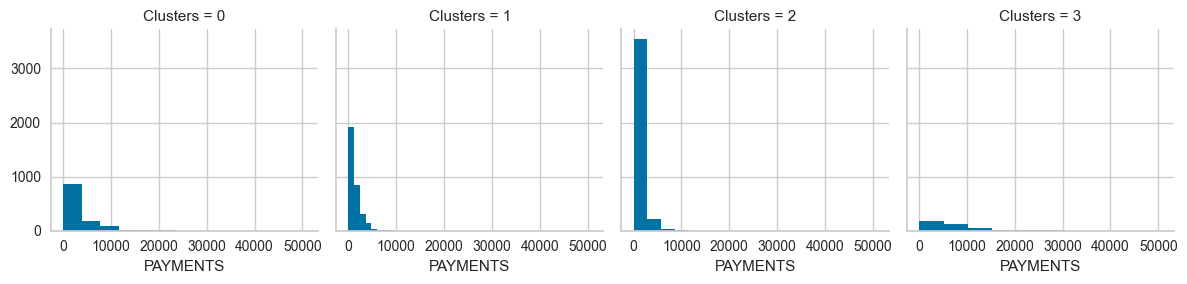

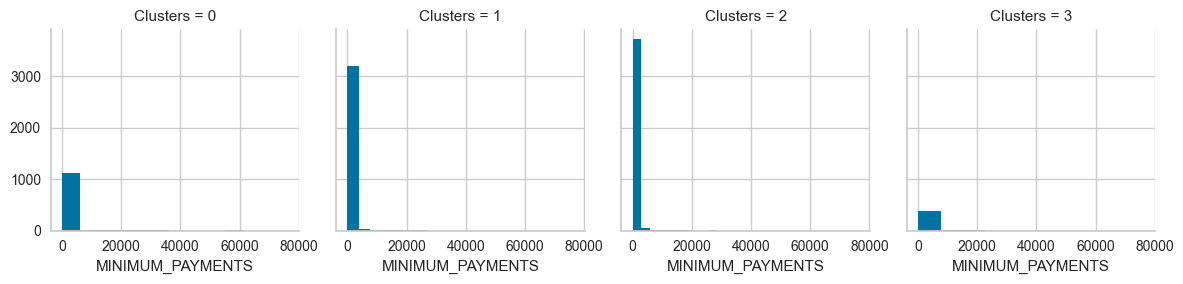

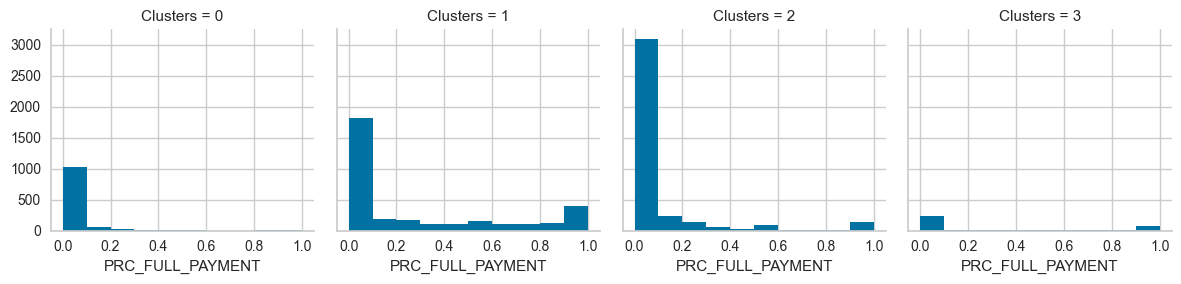

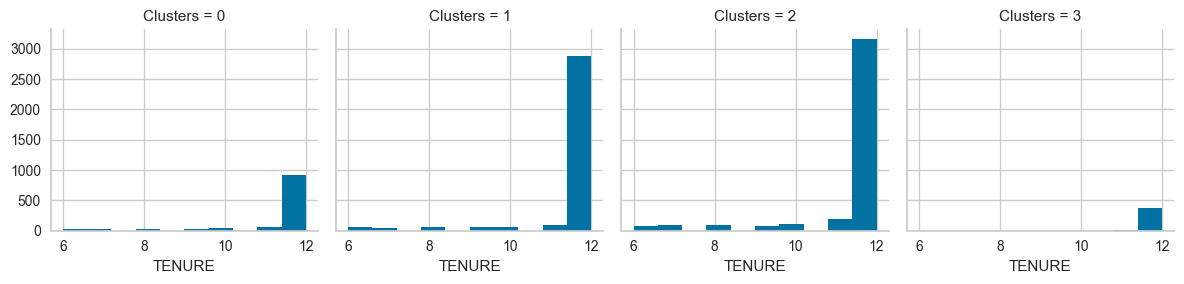

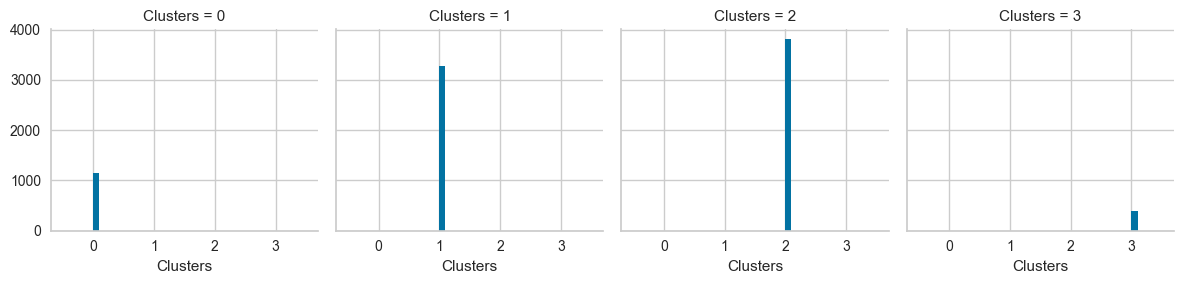

In [101]:
plt.figure(figsize=(20,35))

for col in creditcard_df.columns:

    grid = sns.FacetGrid(creditcard_df, col='Clusters')

    grid.map(plt.hist, col)
    
    plt.show()

**1. Balance and Credit Usage:**
- Group 2 exhibits the highest average balance (3,589.19), followed by Group 0 (4,652.62). This indicates that these groups have more funds available in their accounts for making purchases.
- Group 3 has the lowest average balance (915.83), suggesting that these customers may have lower purchasing power.

**2. Purchase Behavior:**
- Group 2 shows the highest average purchase amount (7,843.31) and also has the highest average number of purchase transactions (90.84). This indicates that this group makes larger and more frequent purchases.
- Group 1 demonstrates the lowest values in terms of average purchase amount (275.04) and average number of purchase transactions (3.03). These customers engage in less frequent and lower-value purchases.

**3. Cash Advances:**
- Group 0 exhibits the highest average cash advance amount (4,582.46) and also the highest frequency of cash advances. This could indicate a higher reliance on cash advances for financial needs within this group.
- Group 1 has the lowest average cash advance amount (603.97) and frequency. This suggests that these customers have less need for cash advances.

**4. Credit Limit and Payments:**
- Group 2 has the highest average credit limit (9,758.31), indicating a greater credit capacity for these customers.
- Group 3 has the lowest average credit limit (4,266.37), suggesting relatively limited credit capacity.
- In terms of payments, Group 2 demonstrates the highest average payment amount (7,464.10), while Group 1 shows the lowest average payment (1,013.02). This could indicate a difference in payment capacity and financial discipline among the groups.

In summary, different customer groups exhibit distinctive financial behavior characteristics. While Group 2 stands out with high balance, purchase amounts, and credit limit, Group 1 has lower balances and purchase activity. Group 0 shows a more frequent use of cash advances, while Group 3 has lower credit limits and payment amounts. These differences suggest varying credit risk profiles and financial behavior among the customer groups.
